<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2024/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Restoration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
imgpath = '/content/drive/MyDrive/class/DIP1/DIP4E'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
f = plt.imread(imgpath+'/test-pattern.tif')
f.shape

(604, 604)

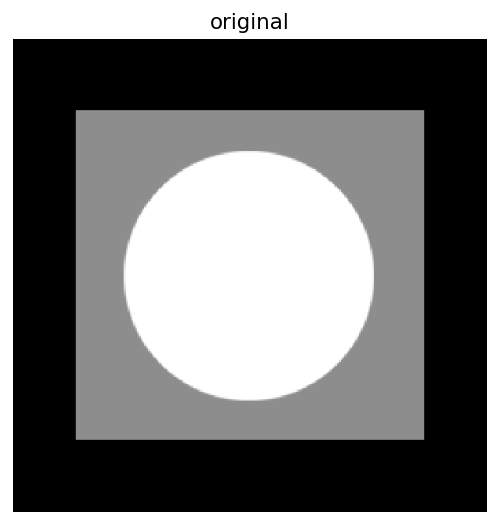

In [4]:
plt.figure(dpi=128)
plt.imshow(f, cmap='gray', aspect = 'equal')
plt.axis('off')
plt.title('original')
plt.show()

### Gaussian Noise

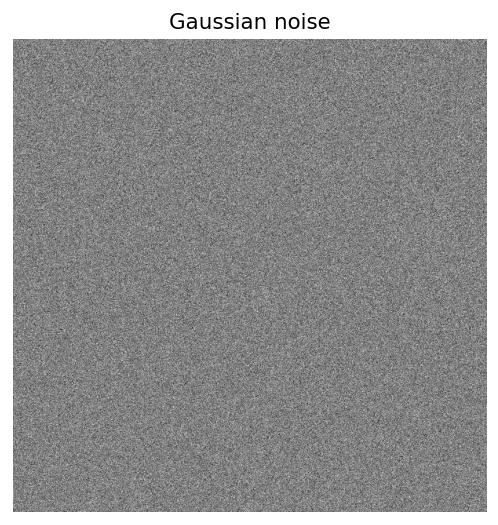

In [5]:
n_gauss = np.random.normal(0,32,f.shape)
plt.figure(dpi=128)
plt.imshow(n_gauss, cmap='gray', aspect = 'equal')
plt.axis('off')
plt.title('Gaussian noise')
plt.show()

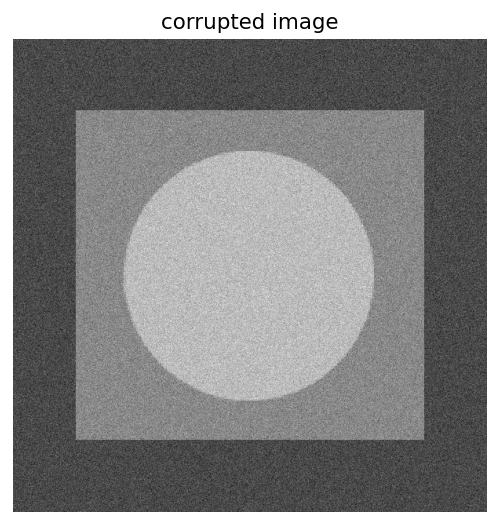

In [6]:
f_n = f + n_gauss
plt.figure(dpi=128)
plt.imshow(f_n,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('corrupted image')
plt.show()

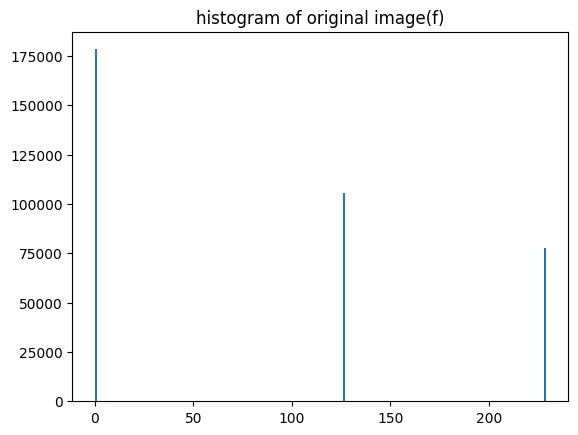

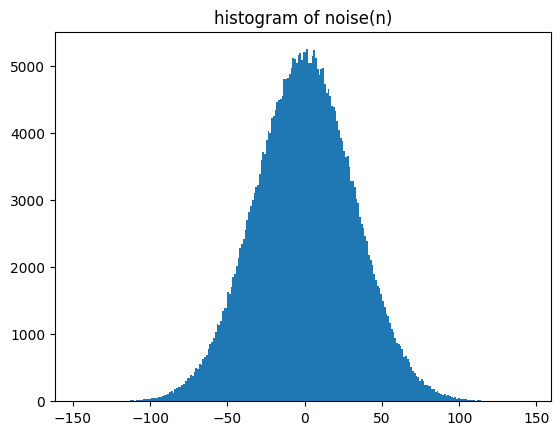

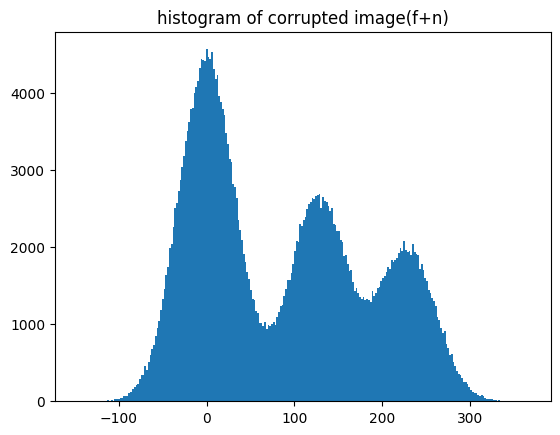

In [7]:
plt.hist(f.ravel(),256)
plt.title('histogram of original image(f)')
plt.show()
plt.hist(n_gauss.ravel(),256)
plt.title('histogram of noise(n)')
plt.show()
plt.hist(f_n.ravel(),256)
plt.title('histogram of corrupted image(f+n)')
plt.show()

### Salt and Pepper Noise

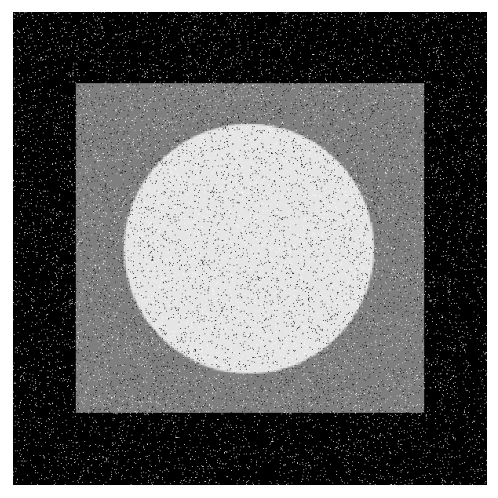

In [8]:
sp = np.random.randint(0,100,np.shape(f))
f_sp = f.copy()
f_sp[sp<3] = 0
f_sp[sp>96] = 255

plt.figure(dpi=128)
plt.imshow(f_sp,cmap='gray',aspect='equal')
plt.axis('off')
plt.show()

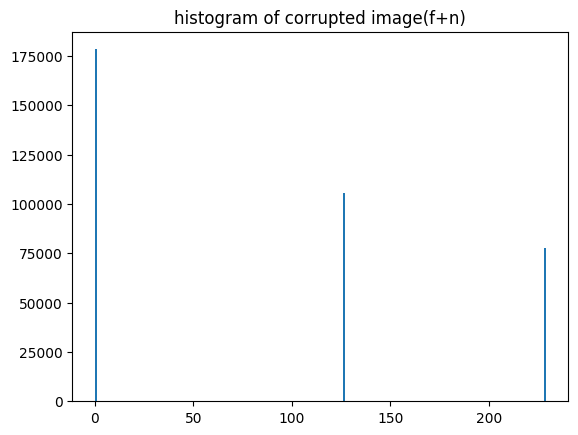

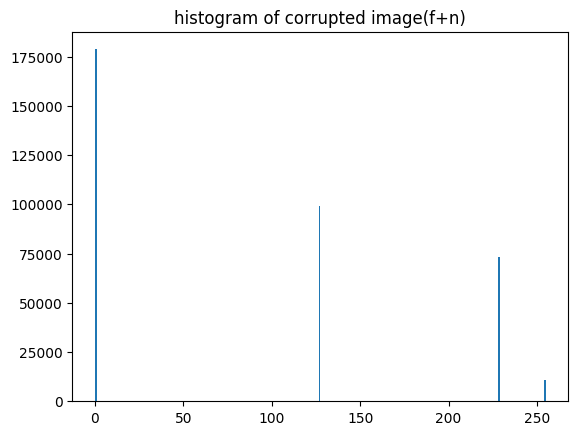

In [9]:
plt.hist(f.ravel(),256)
plt.title('histogram of corrupted image(f+n)')
plt.show()

plt.hist(f_sp.ravel(),256)
plt.title('histogram of corrupted image(f+n)')
plt.show()

### Mean vs Median Filtering

In [10]:
SS = 7 # kernel size (square kernel)
ss = int((SS-1)/2)
r_median = np.zeros(np.shape(f_sp))
r_mean = np.zeros(np.shape(f_sp))

In [11]:
for x in range(ss,np.size(f_sp,0)-ss):
  for y in range(ss,np.size(f_sp,1)-ss):
    Sxy = f_sp[x-ss:x-ss+SS,y-ss:y-ss+SS]
    r_mean[x,y] = np.mean(Sxy)
    r_median[x,y] = np.median(Sxy)

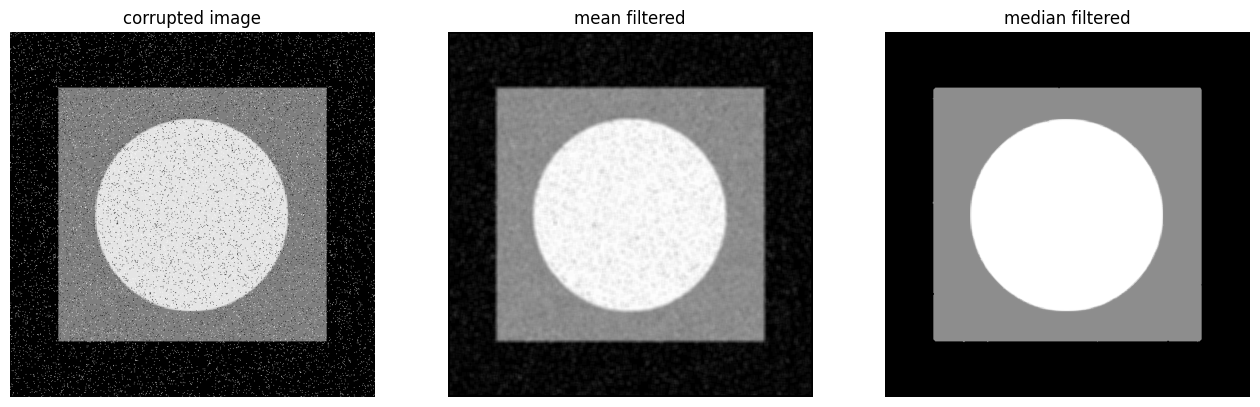

In [12]:
plt.figure(figsize=(16,9))
plt.subplot(131)
plt.imshow(f_sp,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('corrupted image')
plt.subplot(132)
plt.imshow(r_mean,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('mean filtered')
plt.subplot(133)
plt.imshow(r_median,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('median filtered')
plt.show()

## Adaptive Local Noise Reduction

In [13]:
# Adaptive local noise reduction
f = f_n

std_eta = 16
SS = 5

ss = int((SS-1)/2)
r_amean = np.zeros(np.shape(f))
for x in range(ss,np.size(f,0)-ss):
  for y in range(ss,np.size(f,1)-ss):
    Sxy = f[x-ss:x-ss+SS,y-ss:y-ss+SS]
    r_mean[x,y] = np.mean(Sxy)
    std_Sxy = np.std(Sxy)
    r_amean[x,y]=f[x,y]-((std_eta*std_eta)/(std_Sxy*std_Sxy))*(f[x,y]-np.mean(Sxy))

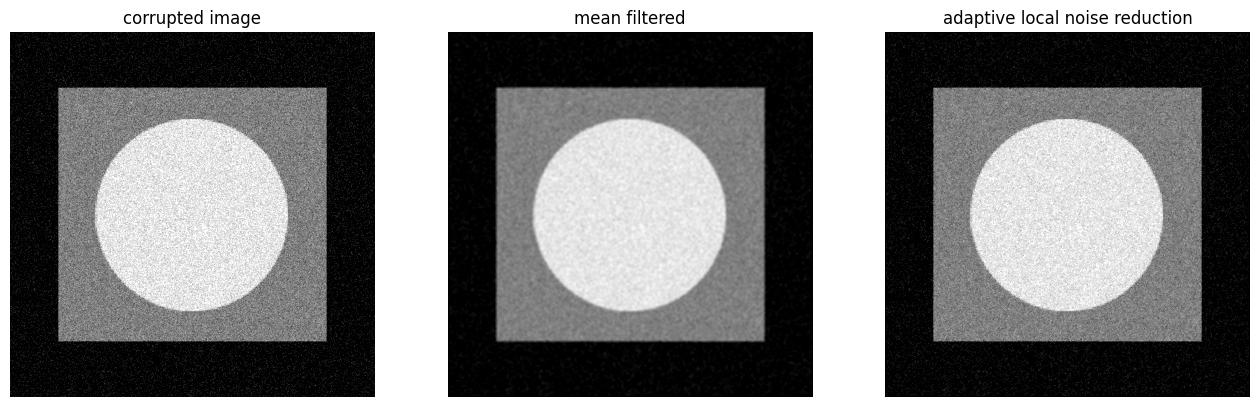

In [14]:
plt.figure(figsize=(16,9))
plt.subplot(131)
plt.imshow(f_n,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('corrupted image')
plt.subplot(132)
plt.imshow(r_mean,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('mean filtered')
plt.subplot(133)
plt.imshow(r_amean,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('adaptive local noise reduction')
plt.show()

## Adaptive Median Filtering

In [16]:
# Adaptive Median Filtering
#f = f_sp
f = plt.imread(imgpath+'/circuitboard-saltandpep.tif')
SS_vals = np.array([3, 5, 7])
r_amedian = np.zeros(np.shape(f))
r_median = np.zeros(np.shape(f))
r_case = np.zeros(np.shape(f))

ss_max = int((np.max(SS_vals)-1)/2)
for x in range(ss_max,np.size(f,0)-ss_max):
  for y in range(ss_max,np.size(f,1)-ss_max):
    flag_go = 1
    cnt = 0
    z_xy = f[x,y]
    for SS in SS_vals:
      ss = int((SS-1)/2)
      Sxy = f[x-ss:x-ss+SS,y-ss:y-ss+SS]
      z_med = np.median(Sxy)
      z_min = np.min(Sxy)
      z_max = np.max(Sxy)

      if cnt==0:
        r_median[x,y] = z_med

      if z_min<z_med and z_med<z_max:
        if z_min<z_xy and z_xy<z_max:
          r_amedian[x,y] = z_xy
          flag_go = 0
        else:
          r_amedian[x,y] = z_med
          flag_go = 0
      else:
        if SS == np.max(SS_vals):
          r_amedian[x,y] = z_med
          flag_go = 0

      if flag_go==0:
        r_case[x,y] = cnt
        break
      cnt = cnt+1

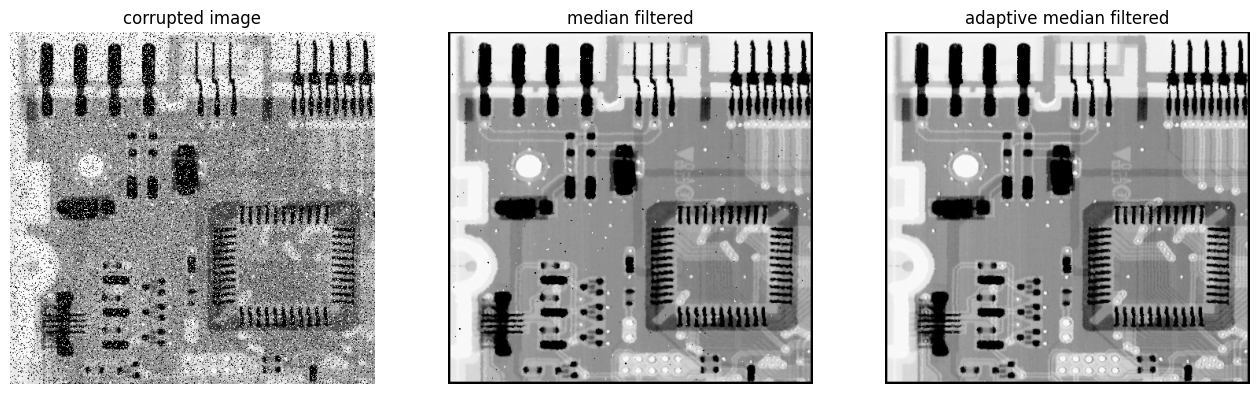

In [17]:
plt.figure(figsize=(16,9))
plt.subplot(131)
plt.imshow(f,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('corrupted image')
plt.subplot(132)
plt.imshow(r_median,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('median filtered')
plt.subplot(133)
plt.imshow(r_amedian,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('adaptive median filtered')
plt.show()

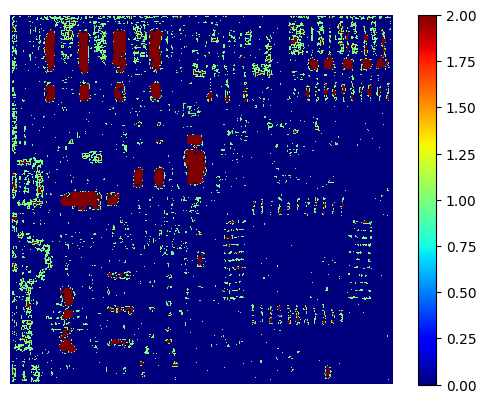

In [18]:
plt.imshow(r_case,cmap='jet',interpolation='nearest')
plt.axis('off')
plt.colorbar()
plt.show()

## Exercise
- 두 개의 noisy image를 각각 f1, f2로 불러오고 적절한 restoration(denoising)을 수행해보자.

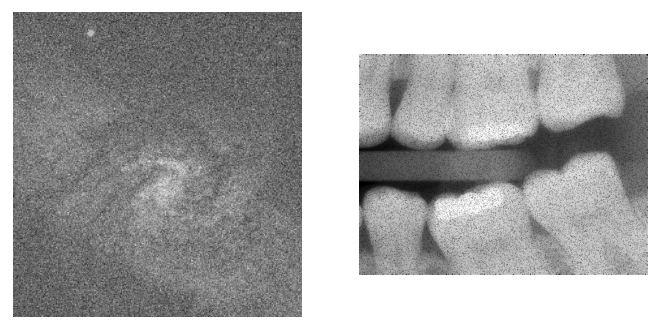

In [19]:
f1 = plt.imread(imgpath+'/galaxy-pair-noisy.tif')
f2 = plt.imread(imgpath+'/dentalXray-pepper-noise.tif')

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(f1,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(f2,cmap='gray')
plt.axis('off')
plt.show()

- 복원코드를 직접 작성해보기.

- 복원된 f1, f2를 시각화하기

In [ ]:
# f1_r: denoised f1
# f2_r: denoised f2
plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(f1_r,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(f2_r,cmap='gray')
plt.axis('off')
plt.show()

- 복원된 f1, f2를 그림파일로 저장하기

In [23]:
plt.imsave('denoised-galaxy-pair.png',f1_r,cmap='gray')
plt.imsave('denoised-dentalXray.png',f2_r,cmap='gray')